In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras import backend as K
import matplotlib.pyplot as plt

import os

In [51]:
len([name for name in os.listdir('Desktop/data/test/') for name in os.listdir('Desktop/data/test/' + name)])

150

In [52]:
len([name for name in os.listdir('Desktop/data/train/') for name in os.listdir('Desktop/data/train/' + name)])

1500

In [53]:
img_width, img_height = 150, 150

train_data_dir = 'Desktop/data/train'
validation_data_dir = 'Desktop/data/test'
nb_train_samples = len([name for name in os.listdir('Desktop/data/train/') for name in os.listdir('Desktop/data/train/' + name)]) #1500
nb_validation_samples = len([name for name in os.listdir('Desktop/data/test/') for name in os.listdir('Desktop/data/test/' + name)]) #150

batch_size = 8

print(K.image_data_format())

if K.image_data_format() == 'channels_first':  #check chanel
    input_shape = (3, img_width, img_height)  
else:
    input_shape = (img_width, img_height, 3)  #chanel last

channels_last


สร้าง model CNN

In [54]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))      #ทำให้ไม่ใช่liner
model.add(MaxPooling2D(pool_size=(2, 2)))     #การหาpixel ที่สำคัญ

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(15)) #class 
model.add(Activation('softmax'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

In [60]:
model.compile(loss='categorical_crossentropy', #categorical_crossentropy สำหรับหลายclass 
                      optimizer='adam',# rmsprop or adagrad or  #adam หาจุดต่ำสุดของerror
                      metrics=['accuracy']) #ความถูกต้อง

In [61]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,      #ลดสเกล
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)    #ทำให้dataมีความหลากหลาย

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') #binary # categorical

print(train_generator.class_indices)

Found 1500 images belonging to 15 classes.
{'Artichoke(GreenGlobe)': 0, 'Artichoke(cardoon)': 1, 'Artichoke(violette)': 2, 'Chinese Cabbage': 3, 'Chinese Kale': 4, 'Dill': 5, 'Lettice green oak': 6, 'Lettuce': 7, 'Myrtus communis': 8, 'Oncidium': 9, 'Potato': 10, 'Red Oakleaf': 11, 'Tomato': 12, 'Vanilla': 13, 'Water morning glory': 14}


In [62]:
test_datagen = ImageDataGenerator(rescale=1. / 255)  #เป็นการรีสเกล

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') #binary # categorical 


print(validation_generator.class_indices)

Found 150 images belonging to 15 classes.
{'Artichoke(GreenGlobe)': 0, 'Artichoke(cardoon)': 1, 'Artichoke(violette)': 2, 'Chinese Cabbage': 3, 'Chinese Kale': 4, 'Dill': 5, 'Lettice green oak': 6, 'Lettuce': 7, 'Myrtus communis': 8, 'Oncidium': 9, 'Potato': 10, 'Red Oakleaf': 11, 'Tomato': 12, 'Vanilla': 13, 'Water morning Glory': 14}


In [63]:
epochs = 200   #รอบน้อยไป จำนวนรอบที่ weigh

history =model.fit_generator(    #เก็บค่าที่เทรนไว้
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,  #stepเข้าไปกี่รูปกี่รอบ
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size)    #เทรนต่อรอบจะฟีตรูปเข้าไปกี่รูป คือจำนวนbatch_size


Epoch 1/200
187/187 [==============================] - 47s 248ms/step - loss: 2.5130 - accuracy: 0.1284 - val_loss: 1.7951 - val_accuracy: 0.4375
Epoch 2/200
187/187 [==============================] - 34s 183ms/step - loss: 2.0765 - accuracy: 0.2893 - val_loss: 1.6029 - val_accuracy: 0.4444
Epoch 3/200
187/187 [==============================] - 33s 174ms/step - loss: 1.8598 - accuracy: 0.3592 - val_loss: 1.4086 - val_accuracy: 0.5417
Epoch 4/200
187/187 [==============================] - 33s 176ms/step - loss: 1.7491 - accuracy: 0.4089 - val_loss: 1.1530 - val_accuracy: 0.6528
Epoch 5/200
187/187 [==============================] - 33s 174ms/step - loss: 1.5036 - accuracy: 0.5113 - val_loss: 1.1534 - val_accuracy: 0.6319
Epoch 6/200
187/187 [==============================] - 32s 173ms/step - loss: 1.5340 - accuracy: 0.4448 - val_loss: 1.0857 - val_accuracy: 0.6250
Epoch 7/200
187/187 [==============================] - 33s 176ms/step - loss: 1.4183 - accuracy: 0.4905 - val_loss: 1.0652 -

In [68]:
model.save('plant.model')

INFO:tensorflow:Assets written to: plant.model\assets


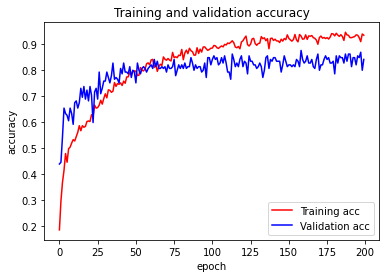

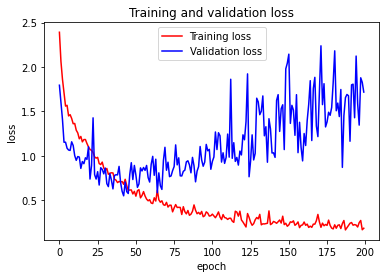

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

# Predict

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [3]:
img_width, img_height = 150, 150

model = load_model('plant.model')

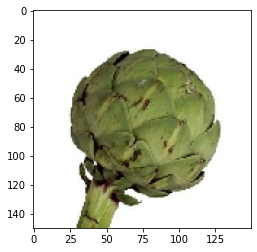

พืช : Red oakleaf
ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด
อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 80:0:20
เมื่อเปรียบเทียบกับแสงจาก : Fluorescent
เร่งการเจริญเติบโตด้าน : น้ำหนักสด
จำนวนชั่วโมงในการเปิดต่อวัน : 16
PPFD = 200 umol/s/m2
--------------------------------------------------------------


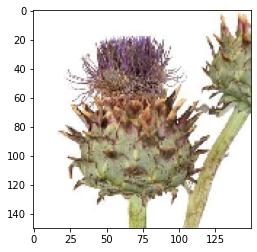

พืช : Red oakleaf
ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด
อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 80:0:20
เมื่อเปรียบเทียบกับแสงจาก : Fluorescent
เร่งการเจริญเติบโตด้าน : น้ำหนักสด
จำนวนชั่วโมงในการเปิดต่อวัน : 16
PPFD = 200 umol/s/m2
--------------------------------------------------------------


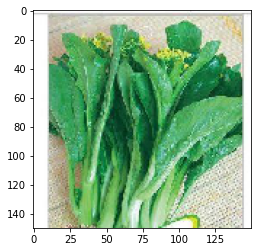

พืช : Water morning glory 
ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด
อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 100:0:0
เมื่อเปรียบเทียบกับแสงจาก : Fluorescent
เร่งการเจริญเติบโตด้าน : ความยาวลำต้น
จำนวนชั่วโมงในการเปิดต่อวัน : 24
ตัวแปรควบคุมอื่น ๆ : Drain aquaponics system
--------------------------------------------------------------


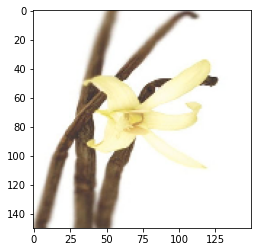

พืช : Vanilla
ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด
อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 50:0:50
เมื่อเปรียบเทียบกับแสงจาก : Fluorescent
เร่งการเจริญเติบโตด้าน : น้ำหนักสด
จำนวนชั่วโมงในการเปิดต่อวัน : 16
PPFD = 25 umol/s/m2
--------------------------------------------------------------


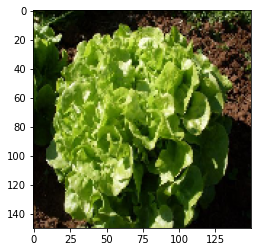

พืช : Lettuce
ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด
อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 88.88:0:11.11
เมื่อเปรียบเทียบกับแสงจาก : Fluorescent
เร่งการเจริญเติบโตด้าน : น้ำหนักสด
จำนวนชั่วโมงในการเปิดต่อวัน : 12
PPFD = 200 umol/s/m2
--------------------------------------------------------------


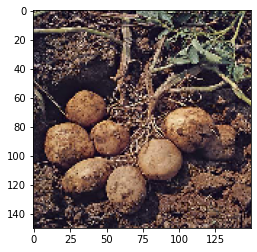

พืช : Vanilla
ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด
อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 50:0:50
เมื่อเปรียบเทียบกับแสงจาก : Fluorescent
เร่งการเจริญเติบโตด้าน : น้ำหนักสด
จำนวนชั่วโมงในการเปิดต่อวัน : 16
PPFD = 25 umol/s/m2
--------------------------------------------------------------


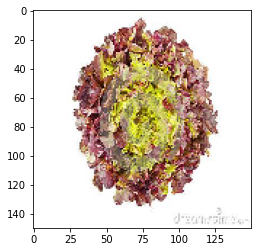

พืช : Red oakleaf
ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด
อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 80:0:20
เมื่อเปรียบเทียบกับแสงจาก : Fluorescent
เร่งการเจริญเติบโตด้าน : น้ำหนักสด
จำนวนชั่วโมงในการเปิดต่อวัน : 16
PPFD = 200 umol/s/m2
--------------------------------------------------------------


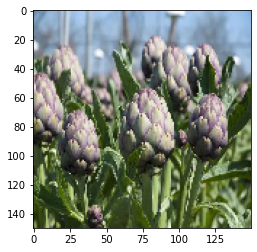

พืช : Myrtus communis
ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด
อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 0:0:100
เมื่อเปรียบเทียบกับแสงจาก : Control
เร่งการเจริญเติบโตด้าน : น้ำหนักสด
จำนวนชั่วโมงในการเปิดต่อวัน : 24
PPFD = 35 umol/s/m2
--------------------------------------------------------------


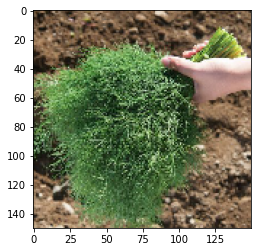

พืช : Dill
ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด
อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 93:0:7
เมื่อเปรียบเทียบกับแสงจาก : High pressure
เร่งการเจริญเติบโตด้าน : ความยาวลำต้น
จำนวนชั่วโมงในการเปิดต่อวัน : 24
PPFD = 100 umol/s/m2
--------------------------------------------------------------


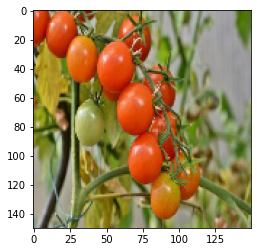

พืช : Tomato 
ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด
อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 66:0:33
เมื่อเปรียบเทียบกับแสงจาก : Fluorescent
เร่งการเจริญเติบโตด้าน : ความยาวลำต้นและน้ำหนักสด
จำนวนชั่วโมงในการเปิดต่อวัน : 24
--------------------------------------------------------------


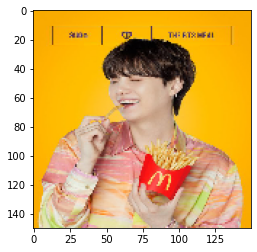

พืช : Oncidium
ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด
อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 100:0:0
เมื่อเปรียบเทียบกับแสงจาก : Fluorecent
เร่งการเจริญเติบโตด้าน : ความยาวลำต้น
จำนวนชั่วโมงในการเปิดต่อวัน : 24
PPFD = 50 umol/s/m2
--------------------------------------------------------------


In [4]:
mypath = 'Desktop/data/predict/'           #ที่อยู่ของfloderที่จะเทส


onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#print(onlyfiles)

# predicting images
for file in onlyfiles:
    #print(file)
    img = image.load_img(mypath+file, target_size=(img_width, img_height)) #150x150
    
    imgplot = plt.imshow(img)
    plt.show()
    
    
    x = image.img_to_array(img)     #แปลงเป็น array
    x /= 255.0
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images)
    #classes = model.predict_classes(images)
    #print(classes)
    #classes = classes[0][0]
    
    if np.argmax(classes) == 0:
        #print("%s , %.2f" % ("Artichoke(GreenGlobe)", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Artichoke(GreenGlobe')
        print("พืช : Artichoke (Greenglobe)") 
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")    
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 100:0:0") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Natural light")      
        print("เร่งการเจริญเติบโตด้าน : ความยาวลำต้น")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 8")      
        print("PPFD = 236.54 umol/s/m2")   
    
    elif np.argmax(classes) == 1:
        #print("%s ,%.2f" % ("Artichoke(cardoon)", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Artichoke(cardoon)')
        print("พืช : Artichoke (Cardoon)") 
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")    
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 100:0:0") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Natural light")      
        print("เร่งการเจริญเติบโตด้าน : ความยาวของลำต้น")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 8")      
        print("PPFD = 236.54 umol/s/m2")   
        
    elif np.argmax(classes) == 2:
        #print("%s ,%.2f" % ("Artichoke(violette)", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Artichoke(violette)')
        print("พืช : Artichoke (Violetto)") 
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")    
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 100:0:0") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Natural light")      
        print("เร่งการเจริญเติบโตด้าน : ความยาวลำต้น")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 8")      
        print("PPFD = 236.54 umol/s/m2")   
          
    elif np.argmax(classes) == 3:
        #print("%s ,%.2f" % ("Chinese Cabbage", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Chinese Cabbage')
        print("พืช : Chinese cabbage") 
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 0:0:100") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Fluorescent")      
        print("เร่งการเจริญเติบโตด้าน : น้ำหนักสด")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 12")      
        print("PPFD = 80 umol/s/m2") 
         
          
    elif np.argmax(classes) == 4:
        #print("%s ,%.2f" % ("Chinese Kale", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Chinese Kale')
        print("พืช : Chinese kale")  
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")      
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 88.88:0:11.11") 
        print("เมื่อเปรียบเทียบกับแสงจาก : White(control)")      
        print("เร่งการเจริญเติบโตด้าน : ความยาวลำต้นและน้ำหนักสด")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 12")      
        print("PPFD = 120 umol/s/m2")   
                 
    elif np.argmax(classes) == 5:
        #print("%s ,%.2f" % ("Dill", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Dill')
        print("พืช : Dill")  
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")      
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 93:0:7") 
        print("เมื่อเปรียบเทียบกับแสงจาก : High pressure")      
        print("เร่งการเจริญเติบโตด้าน : ความยาวลำต้น")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 24")      
        print("PPFD = 100 umol/s/m2")  
          
    elif np.argmax(classes) == 6:
        #print("%s ,%.2f" % ("Lettice green oak", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Lettice green oak')
        print("พืช : Lettice green oak") 
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 75:0:25") 
        print("เมื่อเปรียบเทียบกับแสงจาก : sunlight")      
        print("เร่งการเจริญเติบโตด้าน : ความยาวลำต้น")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 16")      
        print("ตัวแปรควบคุมอื่น ๆ : Hydroponics system") 
          
    elif np.argmax(classes) == 7:
        #print("%s ,%.2f" % ("Lettuce", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Lettuce')
        print("พืช : Lettuce")  
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 88.88:0:11.11") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Fluorescent")      
        print("เร่งการเจริญเติบโตด้าน : น้ำหนักสด")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 12")      
        print("PPFD = 200 umol/s/m2")  
          
    elif np.argmax(classes) == 8:
        #print("%s ,%.2f" % ("Myrtus communis", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Myrtus communis')
        print("พืช : Myrtus communis") 
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 0:0:100") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Control")      
        print("เร่งการเจริญเติบโตด้าน : น้ำหนักสด")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 24")      
        print("PPFD = 35 umol/s/m2")  
              
    elif np.argmax(classes) == 9:
        #print("%s ,%.2f" % ("Oncidium", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Oncidium')
        print("พืช : Oncidium")  
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")  
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 100:0:0") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Fluorecent")      
        print("เร่งการเจริญเติบโตด้าน : ความยาวลำต้น")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 24")      
        print("PPFD = 50 umol/s/m2") 
          
    elif np.argmax(classes) == 10:
        #print("%s ,%.2f" % ("Potato", (classes[0][np.argmax(classes)]*100)))
       # print(file + ": " + 'Potato')
        print("พืช : Potato")
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")      
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 100:0:0") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Fluorescent")      
        print("เร่งการเจริญเติบโตด้าน : ความยาวลำต้นและน้ำหนักสด")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 16")      
        print("PPFD = 100 umol/s/m2")   
              
    elif np.argmax(classes) == 11:
        #print("%s ,%.2f" % ("Red Oakleaf", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Red Oakleaf')
        print("พืช : Red oakleaf")  
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 80:0:20") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Fluorescent")      
        print("เร่งการเจริญเติบโตด้าน : น้ำหนักสด")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 16")      
        print("PPFD = 200 umol/s/m2")  
          
    elif np.argmax(classes) == 12:
        #print("%s ,%.2f" % ("Tomato", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Tomato')
        print("พืช : Tomato ")   
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")     
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 66:0:33") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Fluorescent")      
        print("เร่งการเจริญเติบโตด้าน : ความยาวลำต้นและน้ำหนักสด")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 24")   
          
    elif np.argmax(classes) == 13:
        #print("%s ,%.2f" % ("Vanilla", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Vanilla')
        print("พืช : Vanilla") 
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 50:0:50") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Fluorescent")      
        print("เร่งการเจริญเติบโตด้าน : น้ำหนักสด")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 16")      
        print("PPFD = 25 umol/s/m2")
        
    else:
        #print("%s , %.2f" % ("Water morning Glory", (classes[0][np.argmax(classes)]*100)))
        #print(file + ": " + 'Water morning Glory')
        print("พืช : Water morning glory ")   
        print("ผลข้อมูลการควบคุมการเร่งการเจริญเติบโตของพืชที่ดีที่สุด")
        print("อัตราส่วนแสงเสริมที่ดีที่สุดในการเร่งการเจริญเติบโต R:G:B : 100:0:0") 
        print("เมื่อเปรียบเทียบกับแสงจาก : Fluorescent")      
        print("เร่งการเจริญเติบโตด้าน : ความยาวลำต้น")      
        print("จำนวนชั่วโมงในการเปิดต่อวัน : 24")      
        print("ตัวแปรควบคุมอื่น ๆ : Drain aquaponics system") 
        
    print('--------------------------------------------------------------')